These first 2 technical pieces are for viewing the data. 

In [2]:
# %load nbinit.py
from IPython.display import HTML
HTML("""
<style>
.container { width: 100% !important; padding-left: 1em; padding-right: 2em; }
div.output_stderr { background: #FFA; }
</style>
""")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_table('/home/data/MSA8010/msa8010f16t02/movie_v4.csv', sep=',')

In [5]:
list(df.columns)

['Unnamed: 0',
 'color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

## Step 1: Investigate Data Set
- We have a number of categorical data: What's their cardinality? How are the levels distributed?
- What's the distribution on numeric values? Do we see any correlations?

Let's first look at columns (i.e. variables) with continuous values. We can get a sense of the distribution from aggregate functions like mean, standard variation, quantiles, as well as, minimum and maximum values.

The Pandas method `describe` creates a table view of those metrics. (The methods can also be used to identify numeric features in the data frame.

In [6]:
### use sets and '-' difference operation 'A-B'. Also there is a symmetric different '^'
#all_features = set(df.columns)-set(['imdb_score'])-set(['movie_imdb_link'])-set(['Unnamed: 0'])
#all_features = set(df.columns)-set(['imdb_score'])-set(['movie_imdb_link'])-set(['Unnamed: 0'])-set(['facenumber_in_poster'])-set(['actor_3_facebook_likes'])-set(['actor_2_facebook_likes'])-set(['actor_1_facebook_likes'])-set(['color'])-set(['aspect_ratio'])-set(['content_rating'])-set(['cast_total_facebook_likes'])-set(['title_year'])-set(['country'])-set(['movie_facebook_likes'])
all_features = set(df.columns)-set(['imdb_score'])-set(['movie_imdb_link'])-set(['Unnamed: 0'])-set(['facenumber_in_poster'])-set(['actor_3_facebook_likes'])-set(['actor_2_facebook_likes'])-set(['actor_1_facebook_likes'])-set(['color'])-set(['aspect_ratio'])-set(['content_rating'])
all_features
#print("All features:         ", ", ".join(all_features), "\nNumerical features:   ", ", ".join(num_features), "\nCategorical features: ", ", ".join(cat_features))
#-set(['facenumber_in_poster'])-set(['actor_3_facebook_likes'])-set(['actor_2_facebook_likes'])-set(['actor_1_facebook_likes'])-set(['color'])-set(['aspect_ratio'])-set(['content_rating'])

{'actor_1_name',
 'actor_2_name',
 'actor_3_name',
 'cast_total_facebook_likes',
 'country',
 'director_facebook_likes',
 'director_name',
 'duration',
 'genres',
 'language',
 'movie_facebook_likes',
 'movie_title',
 'num_critic_for_reviews',
 'num_user_for_reviews',
 'num_voted_users',
 'title_year'}

Let's look at the distribution of numerical features...

ValueError: num must be 1 <= num <= 12, not 13

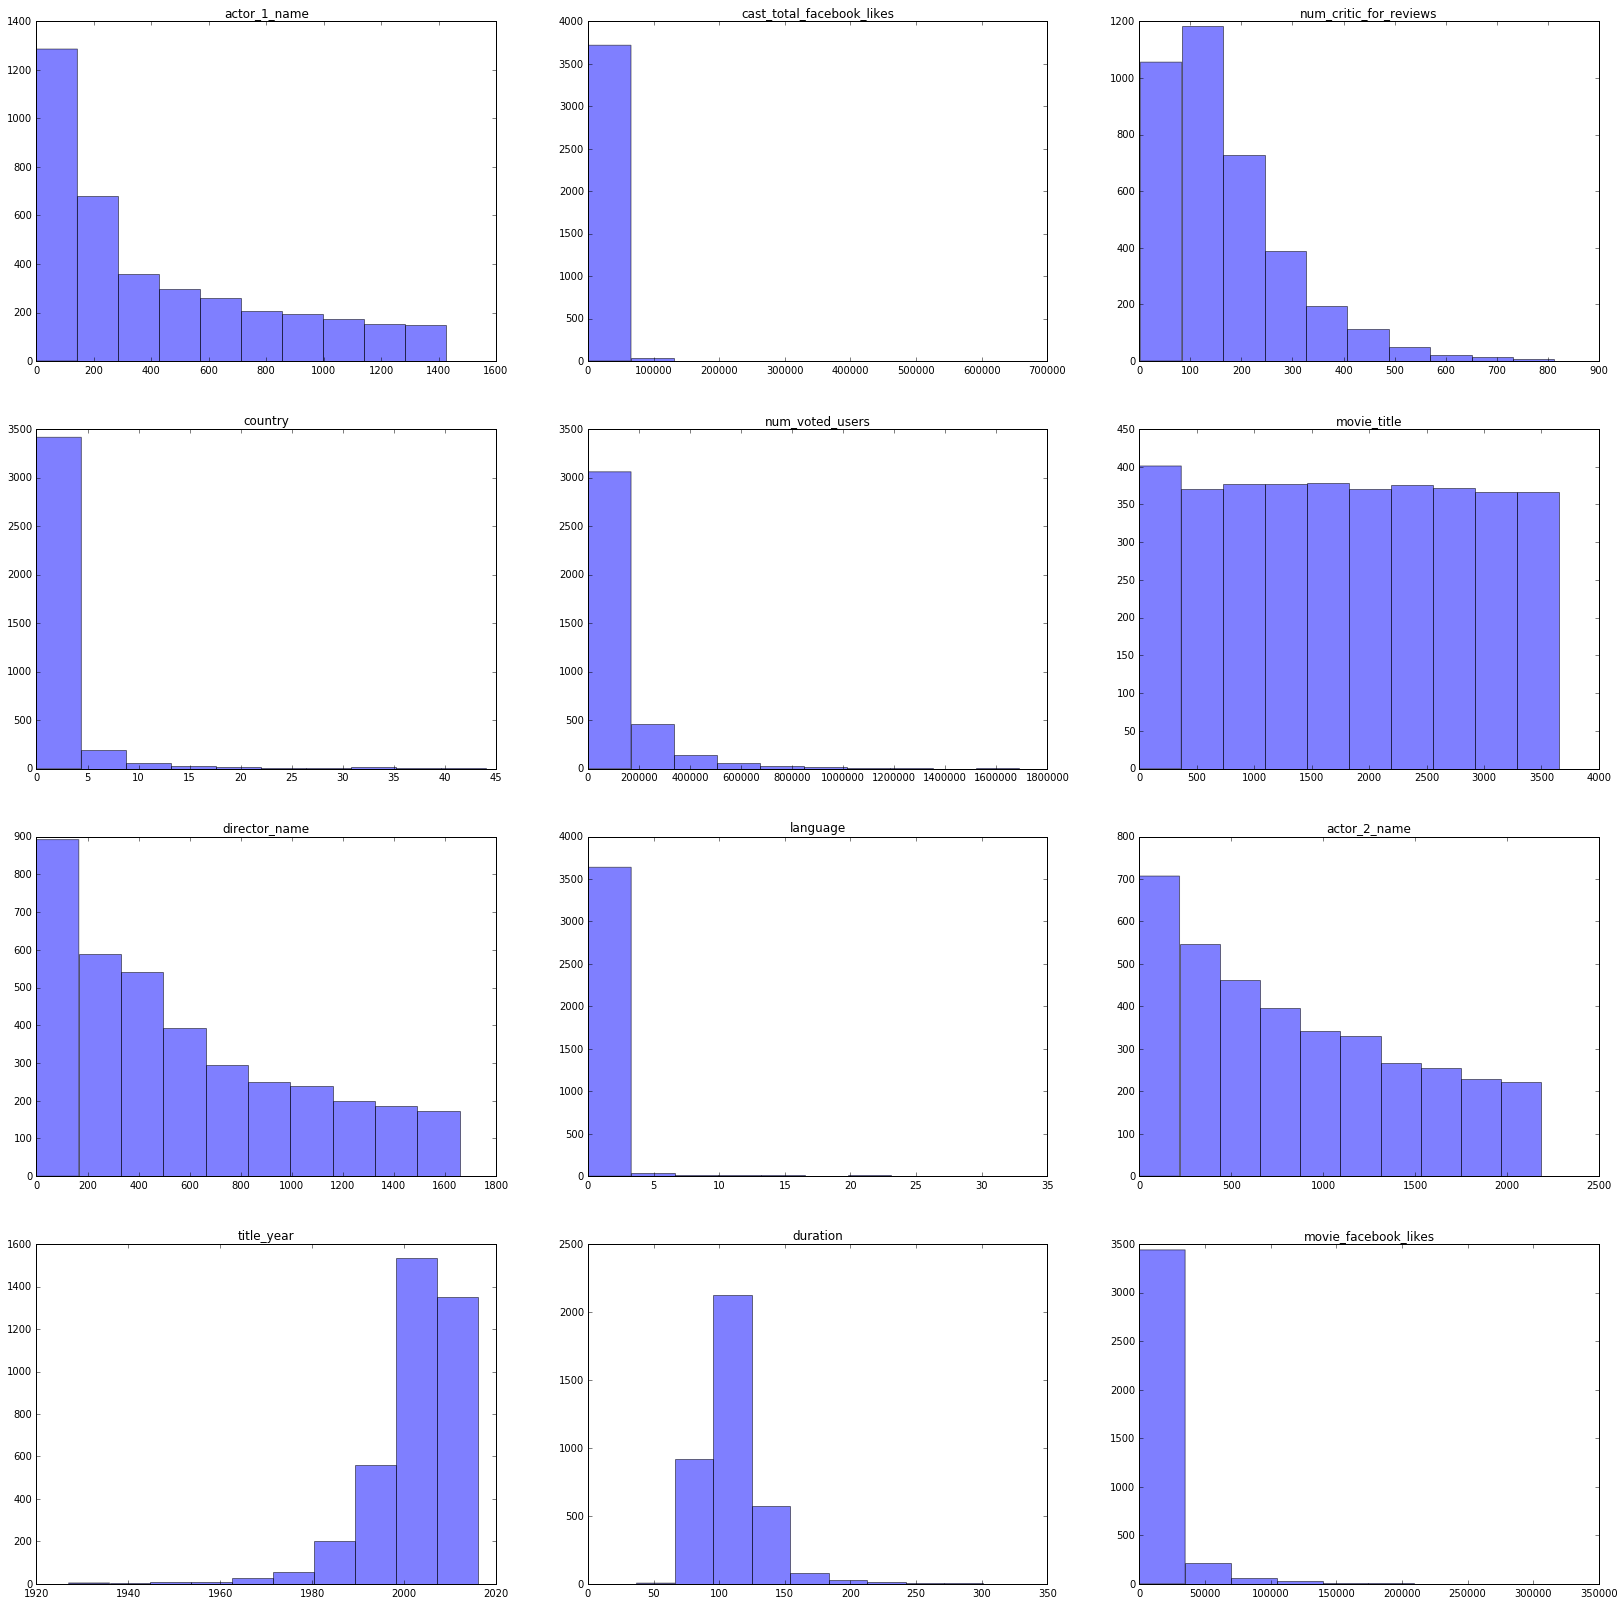

In [7]:
%matplotlib inline
fig = plt.figure(figsize=(28, 28))
for i in range(len(all_features)):
    f = list(all_features)[i]
    plt.subplot(4, 4, i+1)
    hst = plt.hist(df[f], alpha=0.5)
    plt.title(f)
plt.suptitle('Distribution of Numeric Values', fontsize=20)
None

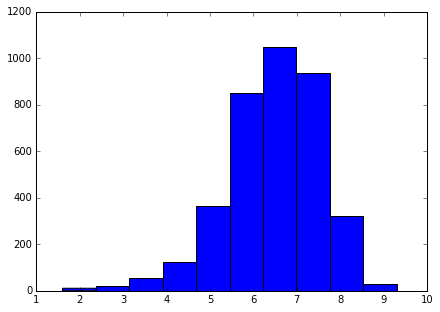

In [8]:
%matplotlib inline
fig = plt.figure(figsize=(7,5))
plt.hist(df['imdb_score'])
fig.savefig('imdb_score.png')

## Step 3: Training
Now that we have our DataFrame prepared, we can create the feature matrix `X` and target vector `y`:
1. split data into **training** and **test** sets
2. fit the model

In [9]:
X = df[list(all_features)].as_matrix()
y = df.imdb_score.as_matrix()
X, y

(array([[  0.00000000e+00,   4.83400000e+03,   7.23000000e+02, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  1.00000000e+00,   4.83500000e+04,   3.02000000e+02, ...,
           1.00000000e+00,   5.63000000e+02,   1.00000000e+00],
        [  2.00000000e+00,   1.17000000e+04,   6.02000000e+02, ...,
           2.00000000e+00,   0.00000000e+00,   2.00000000e+00],
        ..., 
        [  1.42500000e+03,   3.68000000e+02,   1.43000000e+02, ...,
           2.58400000e+03,   2.91000000e+02,   2.01000000e+02],
        [  1.42600000e+03,   1.47000000e+02,   5.60000000e+01, ...,
           2.58500000e+03,   0.00000000e+00,   3.78000000e+02],
        [  1.42700000e+03,   1.63000000e+02,   4.30000000e+01, ...,
           2.58600000e+03,   1.60000000e+01,   6.97000000e+02]]),
 array([ 7.9,  7.1,  6.8, ...,  7. ,  6.9,  6.6]))

In [10]:
### Scikit-learn provides us with a nice function to split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [11]:
from sklearn.neural_network import MLPRegressor
reg = MLPRegressor()

In [12]:
reg.fit(X_train, y_train)
score_train = reg.score(X_train, y_train)
score_test = reg.score(X_test, y_test)
print('Ratio of correctly classified samples for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))

Ratio of correctly classified samples for:
	Training-set:	-37511.294815
	Test-set:	-43292.819355


try using keras

In [13]:
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [ ]:
# define base mode
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=23, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# model 2
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(23, input_dim=23, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# model 3
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=23, init='normal', activation='relu'))
    model.add(Dense(6, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# model 4
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(23, input_dim=23, init='normal', activation='relu'))
    model.add(Dense(11, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# model 5
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(7, input_dim=23, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# model 6
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(5, input_dim=23, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# model 7
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(3, input_dim=23, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [14]:
# model 8
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(5, input_dim=16, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# model 9
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(4, input_dim=16, init='normal', activation='relu'))
    model.add(Dense(4, init='normal', activation='relu'))
    model.add(Dense(4, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# model 10
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(5, input_dim=12, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [15]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)

1 Results: 1.09 (0.13) MSE

In [16]:
# evaluate model with standardized dataset
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: 0.64 (0.08) MSE


*on full dataset*  
1 Standardized: 0.75 (0.30) MSE  
2 Standardized: 0.99 (1.02) MSE  
3 Standardized: 0.79 (0.41) MSE  
4 Standardized: 0.86 (0.70) MSE  
5 Standardized: 0.67 (0.11) MSE  
6 Standardized: 0.65 (0.09) MSE  
7 Standardized: 0.65 (0.10) MSE  

*on reduced dataset*  
8 Standardized: 0.62 (0.08) MSE  
9 Standardized: 0.64 (0.08) MSE  
  
*on mega reduced set*  
10 Standardized: 0.64 (0.08) MSE

In [18]:
# create model with standardized dataset
model = pipeline.fit(X_train, y_train)

## Step 4: Evaluate Model
1. predict $\hat y$ for your model on **test set**
2. calculate confusion matrix and derive measures
3. visualize if suitable

Now, we use out classifier and predict on the test set (In order to get the `ŷ` character type: 'y\hat' followed by the TAB-key.) 

In [15]:
ŷ = model.predict(X_test)

In [17]:
results = model.score(X_test, y_test)
print("Standardized: %.2f MSE" % results)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: 0.69 MSE
Standardized: 0.69 (0.00) MSE


## Step 5: Plot the output

In [18]:
df['ŷ']=model.predict(X)

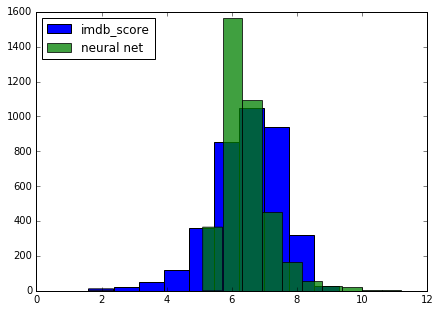

In [19]:
%matplotlib inline
fig = plt.figure(figsize=(7,5))
plt.hist(df['imdb_score'], label ='imdb_score')
plt.hist(df['ŷ'], alpha=0.75, label = 'neural net')
plt.legend(loc='upper left')
fig.savefig('neural_net.png')

In [22]:
df['imdb_score'].max()-df['imdb_score'].min()

7.7000000000000011